# Лабораторная работа №3. Линейная регрессия
## Общее задание

Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск
1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, test set). Использовать стандартные функции (train_test_split и др. нельзя).
2. С использованием библиотеки [scikit-learn](http://scikit-learn.org/stable/) обучить модель линейной регрессии по обучающей выборке [пример](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
3. Проверить точность модели по тестовой выборке
4. Построить модель с использованием полиномиальной функции [пример](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py). Построить графики зависимости точности на обучающей и тестовой выборке от степени полиномиальной функции.
5. Построить модель с использованием регуляризации [пример](http://scikit-learn.org/stable/modules/linear_model.html). На основе экспериментов подобрать параметры для регуляризации.
Построить графики зависимости точности модели на обучающей и тестовой выборках от коэффициента регуляризации.


MSE: 0.000116
R²: 0.3057
Train R²: [0.4878466714112826]
Test R²: [0.30568232114225213]
Train R²: [0.4878466714112826, 0.535824396794893]
Test R²: [0.30568232114225213, 0.19882512842590805]
Train R²: [0.4878466714112826, 0.535824396794893, 0.6934199953458766]
Test R²: [0.30568232114225213, 0.19882512842590805, 0.025550612486945123]
Train R²: [0.4878466714112826, 0.535824396794893, 0.6934199953458766, 0.8953514081470673]
Test R²: [0.30568232114225213, 0.19882512842590805, 0.025550612486945123, -95.75863252930023]
Train R²: [0.4878466714112826, 0.535824396794893, 0.6934199953458766, 0.8953514081470673, 1.0]
Test R²: [0.30568232114225213, 0.19882512842590805, 0.025550612486945123, -95.75863252930023, -4604.43404849547]


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


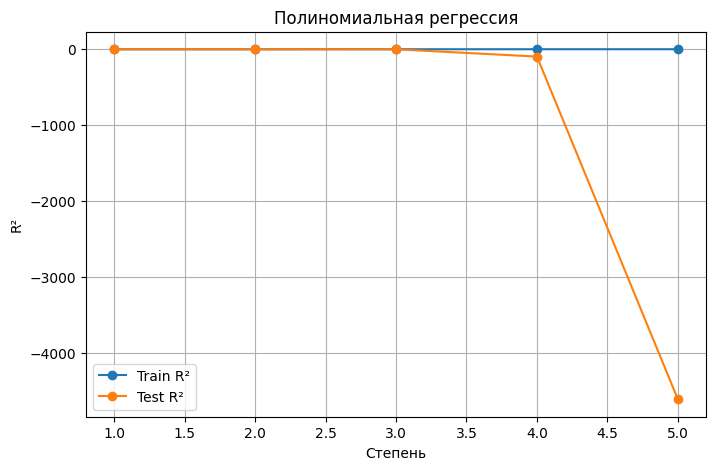

Ridge Train R²: [0.48784667141128246, 0.48784667141128246, 0.4878466714112826, 0.4878466714112826, 0.48784667141128246, 0.48784667141125904, 0.48784667140827975, 0.48784667102875445, 0.4878466228471293, 0.4878407336589815, 0.48734480132749447, 0.47979976289696, 0.4466122589315772, 0.22550618182723403, 0.031393682612974594, 0.002921708405196566, 0.0002599826264477745, 2.3040126045037468e-05, 2.0411199160852433e-06, 1.8081659736157718e-07]
Ridge Test R²: [0.3056823211423879, 0.305682321143783, 0.3056823211595302, 0.30568232133729045, 0.30568232334391665, 0.30568234599541544, 0.30568260168688144, 0.3056854871071719, 0.305717941675098, 0.3060698213785522, 0.3086800793625605, 0.30589575419059034, 0.2594665856719104, 0.1077375821967792, -0.0019214304471952826, -0.01747570938501819, -0.018924804603143164, -0.019053760667630648, -0.019065189071649113, -0.019066201512234482]


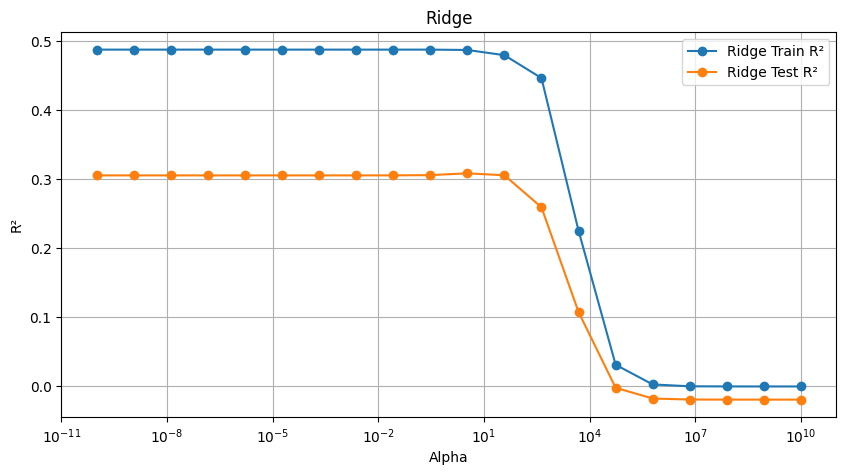

Lasso Train R²: [0.48784667141127847, 0.48784667141072935, 0.48784667134038795, 0.48784666249459085, 0.4878459732193712, 0.48770608175007757, 0.48456425717220397, 0.45964025687651267, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Lasso Test R²: [0.3056823310159159, 0.30568243391972294, 0.3056835953217031, 0.3056960833819936, 0.3057786846614783, 0.3072857167775065, 0.3137395823119451, 0.2825499208309161, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173, -0.019066299918779173]


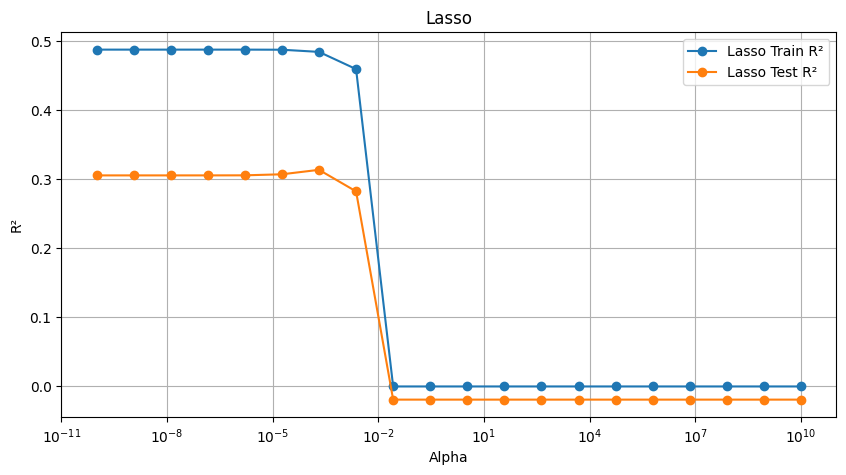

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error, r2_score # type: ignore
from sklearn.preprocessing import PolynomialFeatures # type: ignore
from sklearn.pipeline import make_pipeline # type: ignore
from sklearn.linear_model import Ridge, Lasso # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
import matplotlib.pyplot as plt
df = pd.read_excel('data_akbilgic.xlsx', sheet_name='orjinal data', skiprows=2)
df.columns = ['date', 'ISE_TL', 'ISE_USD', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']


df = df.dropna()


X = df[['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].values
y = df['ISE_TL'].values


split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.6f}")
print(f"R²: {r2:.4f}")
train_scores = []  
test_scores = []   
degrees = range(1, 6)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    
    train_scores.append(r2_score(y_train, train_pred))  
    test_scores.append(r2_score(y_test, test_pred))     
    print(f"Train R²: {train_scores}")
    print(f"Test R²: {test_scores}")

plt.figure(figsize=(8, 5))
plt.plot(degrees, train_scores, marker='o', label="Train R²")
plt.plot(degrees, test_scores, marker='o', label="Test R²")
plt.xlabel("Степень")
plt.ylabel("R²")
plt.title("Полиномиальная регрессия")
plt.legend()
plt.grid(True)
plt.show()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-10, 10, 20)
ridge_train_scores = []
ridge_test_scores = []
lasso_train_scores = []
lasso_test_scores = []

for alpha in alphas:
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_train_scores.append(ridge.score(X_train_scaled, y_train))
    ridge_test_scores.append(ridge.score(X_test_scaled, y_test))
    
    
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_train_scores.append(lasso.score(X_train_scaled, y_train))
    lasso_test_scores.append(lasso.score(X_test_scaled, y_test))
print(f"Ridge Train R²: {ridge_train_scores}")
print(f"Ridge Test R²: {ridge_test_scores}")

plt.figure(figsize=(10, 5))
plt.semilogx(alphas, ridge_train_scores, marker='o', label="Ridge Train R²")
plt.semilogx(alphas, ridge_test_scores, marker='o', label="Ridge Test R²")
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.title("Ridge")
plt.legend()
plt.grid(True)
plt.show()
print(f"Lasso Train R²: {lasso_train_scores}")
print(f"Lasso Test R²: {lasso_test_scores}")
plt.figure(figsize=(10, 5))
plt.semilogx(alphas, lasso_train_scores, marker='o', label="Lasso Train R²")
plt.semilogx(alphas, lasso_test_scores, marker='o', label="Lasso Test R²")
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.title("Lasso")
plt.legend()
plt.grid(True)
plt.show()